In [1]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
from sklearn import metrics, model_selection
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\vaitnd\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\vaitnd\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Reading/Loading the train/test data

traindata = pd.read_csv('train_data.csv')
testdata = pd.read_csv('test_data.csv')

In [3]:
# Creating a new dataframe for preprocessing
a = traindata.copy()
# Observations
print(a.shape)
print(a.columns)
a.info()

(614, 13)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
#Identifying the null counts for all columns
a.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Filling the NULL columns with back fill values from the next column

a.fillna(method='bfill', inplace=True)
a.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [6]:
# Identifying the UNIQUE values for the categorical columns
print('Gender: ', a['Gender'].unique())
print('Married: ', a['Married'].unique())
print('Dependents: ', a['Dependents'].unique())
print('Education: ', a['Education'].unique())
print('Self_Employed: ', a['Self_Employed'].unique())
print('Property_Area: ', a['Property_Area'].unique())
print('Loan_Status: ', a['Loan_Status'].unique())

Gender:  ['Male' 'Female']
Married:  ['No' 'Yes']
Dependents:  ['0' '1' '2' '3+']
Education:  ['Graduate' 'Not Graduate']
Self_Employed:  ['No' 'Yes']
Property_Area:  ['Urban' 'Rural' 'Semiurban']
Loan_Status:  ['Y' 'N']


In [7]:
# Changing the categorical target column in to numeric column

a['Loan_Status'] = np.where(a.Loan_Status =='Y',1,0)

In [8]:
#Relationship between the independent and dependent variables

a.corr()['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.516944
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.039871
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

Text(0,0.5,'No of Customers')

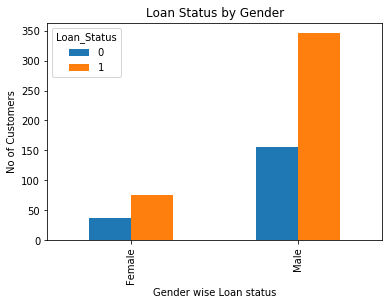

In [9]:
# Data visualization

pd.crosstab(a.Gender,a.Loan_Status).plot(kind='bar')
plt.title('Loan Status by Gender')
plt.xlabel('Gender wise Loan status')
plt.ylabel('No of Customers')

The Status of the loan depends a great deal on the Gender. Thus, Gender can be a good predictor of the outcome variable.

Text(0,0.5,'No of Customers')

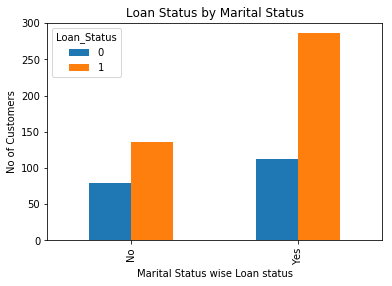

In [10]:
# Data visualization

pd.crosstab(a.Married,a.Loan_Status).plot(kind='bar')
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status wise Loan status')
plt.ylabel('No of Customers')

Married customers have a better loan purchase rate than the unmarried customers. Hence Married column can also help predicting the Loan Status

Text(0,0.5,'No of Customers')

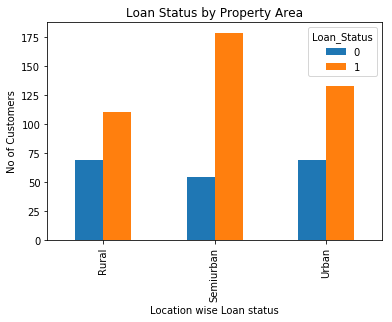

In [11]:
# Data visualization

pd.crosstab(a.Property_Area,a.Loan_Status).plot(kind='bar')
plt.title('Loan Status by Property Area')
plt.xlabel('Location wise Loan status')
plt.ylabel('No of Customers')

Loans sanctioned are more for semiurban area compared to urban & rural areas. So Property Area can be a good predictor variable

Text(0,0.5,'No of Customers')

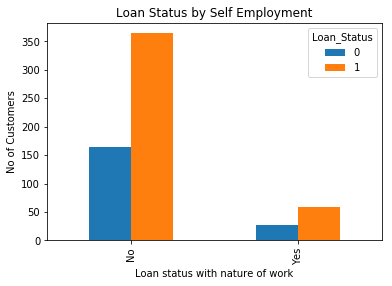

In [12]:
# Data visualization

pd.crosstab(a.Self_Employed,a.Loan_Status).plot(kind='bar')
plt.title('Loan Status by Self Employment')
plt.xlabel('Loan status with nature of work')
plt.ylabel('No of Customers')

Self Employment status column may help for the prediction

In [13]:
# Splitting X and Y -- dropping the target and irrelevant columns from X

X = a.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = a['Loan_Status']
print(X.shape)

# Creating the dummy variables for the categorical columns

X = pd.get_dummies(X)
print(X.shape)
print(y.shape)
X.columns

(614, 11)
(614, 20)
(614,)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [14]:
# Identfying the top 16 columns using Recursive Feature Elimination process

# Feature selection using Logistic Regression

logreg = LogisticRegression()
rfe = RFE(logreg, 16)
rfe = rfe.fit(X,y)
z=rfe.support_
m=set(X.columns[z])
X=X[X.columns[z]]
print(X.shape)
m

(614, 16)


{'Credit_History',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Self_Employed_No',
 'Self_Employed_Yes'}

In [15]:
# Feature selection using DecisionTreeClassifier

dt = DecisionTreeClassifier()
U = pd.get_dummies(X)
rfe = RFE(dt, 16)
rfe = rfe.fit(U,y)

zz=rfe.support_
mm=set(U.columns[zz])
mm

{'Credit_History',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Self_Employed_No',
 'Self_Employed_Yes'}

In [16]:
# Feature selection using DecisionTreeRegressor

dtr = DecisionTreeRegressor()
V = pd.get_dummies(X)
rfe = RFE(dtr, 16)
rfe = rfe.fit(V,y)

zzz=rfe.support_
mmm=set(V.columns[zzz])
mmm

{'Credit_History',
 'Dependents_0',
 'Dependents_1',
 'Dependents_2',
 'Dependents_3+',
 'Education_Graduate',
 'Education_Not Graduate',
 'Gender_Female',
 'Gender_Male',
 'Married_No',
 'Married_Yes',
 'Property_Area_Rural',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Self_Employed_No',
 'Self_Employed_Yes'}

In [17]:
# Feature selection using RandomForestClassifier

rf = RandomForestClassifier()
W = pd.get_dummies(X)
rfe = RFE(rf, 16)
rfe = rfe.fit(W,y)

zw=rfe.support_
n=set(W.columns[zw])

# Feature selection using RandomForestRegressor

rfr = RandomForestRegressor()
T = pd.get_dummies(X)
rfe = RFE(rfr, 16)
rfe = rfe.fit(T,y)

zt=rfe.support_
nn=set(T.columns[zt])

In [18]:
print(m.difference(mmm))
print(mmm.difference(n))
print(n.difference(nn))

set()
set()
set()


In [19]:
# Logistic Regression model fitting with 16 columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=124)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print("Accuracy of test data is ", accuracy_score(y_test,y_pred))
y_pred1 = logreg.predict(X_train)
print("Accuracy of train data is ", accuracy_score(y_train,y_pred1))

#Accuracy of test data is  0.8376623376623377
#Accuracy of train data is  0.7913043478260869

Accuracy of test data is  0.8376623376623377
Accuracy of train data is  0.7913043478260869


In [20]:
# Logistic Regression model fitting with multinomial class
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
logreg1 = LogisticRegression(multi_class='multinomial',solver='sag')
logreg1.fit(X_train, y_train)
y_pred_1 = logreg1.predict(X_test)
print("Accuracy of test data is ", accuracy_score(y_test,y_pred_1))
y_pred_2 = logreg1.predict(X_train)
print("Accuracy of train data is ", accuracy_score(y_train,y_pred_2))

#Accuracy of test data is  0.8311688311688312
#Accuracy of train data is  0.7934782608695652

Accuracy of test data is  0.8311688311688312
Accuracy of train data is  0.7934782608695652


In [21]:
# Identfying the top 14 columns using Recursive Feature Elimination process

# Feature selection using Logistic Regression
X = a.drop(['Loan_ID', 'Loan_Status'], axis=1)
R = pd.get_dummies(X)
logreg = LogisticRegression()
rfe = RFE(logreg, 14)
rfe = rfe.fit(R,y)
s=rfe.support_
p=set(R.columns[s])
X=R[R.columns[s]]
print(m.difference(p))
print(p.difference(m))

{'Dependents_0', 'Married_Yes'}
set()


In [22]:
print(X.shape)
X.columns

(614, 14)


Index(['Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [23]:
# Logistic Regression model fitting with 14 columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=322)
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

# Predicting the test set results and calculating the accuracy

y_pred = logreg2.predict(X_test)
print("Accuracy of test data is ", accuracy_score(y_test,y_pred))
y_pred1 = logreg2.predict(X_train)
print("Accuracy of train data is ", accuracy_score(y_train,y_pred1))

#Accuracy of test data is  0.8378378378378378
#Accuracy of train data is  0.7878787878787878

Accuracy of test data is  0.8378378378378378
Accuracy of train data is  0.7878787878787878


In [24]:
# Logistic Regression model fitting with multinomial class for top 14 cols
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=321)
logreg3 = LogisticRegression(multi_class='multinomial',solver='sag')
logreg3.fit(X_train, y_train)
y_pred_1 = logreg3.predict(X_test)
print("Accuracy of test data is ", accuracy_score(y_test,y_pred_1))
y_pred_2 = logreg3.predict(X_train)
print("Accuracy of train data is ", accuracy_score(y_train,y_pred_2))

#Accuracy of test data is  0.8617886178861789
#Accuracy of train data is  0.7881873727087576

Accuracy of test data is  0.8617886178861789
Accuracy of train data is  0.7881873727087576


The Logistic Regression model with multinomial class has the best accuracy rate 

In [25]:
# DecisionTreeClassifier model fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=321)
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt1 = dt.predict(X_test)
print("Accuracy of test data is ", accuracy_score(y_test,y_pred_dt1))
y_pred_dt2 = dt.predict(X_train)
print("Accuracy of train data is ", accuracy_score(y_train,y_pred_dt2))

#Accuracy of test data is  0.8054054054054054
#Accuracy of train data is  0.8228438228438228

Accuracy of test data is  0.8054054054054054
Accuracy of train data is  0.8228438228438228


In [26]:
# RandomForestClassifier model fitting
train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=321)
rf = RandomForestClassifier(n_estimators=25)
rf.fit(X_train, y_train)
y_pred_rf1 = rf.predict(X_test)
print("Accuracy of test data is ", accuracy_score(y_test,y_pred_rf1))
y_pred_rf2 = rf.predict(X_train)
print("Accuracy of train data is ", accuracy_score(y_train,y_pred_rf2))

Accuracy of test data is  0.8216216216216217
Accuracy of train data is  0.8228438228438228


In [27]:
logreg3.predict([[0,0,1,0,0,1,0,0,1,1,0,1,0,0], [1,0,1,0,0,1,0,1,0,1,0,0,0,1]])

array([0, 1])

In [28]:
## EDA with test data file

d = testdata.copy()
print(d.shape)
print(d.columns)
d.isnull().sum()

(367, 12)
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [29]:
d.fillna(method = "bfill", inplace = True) 
d.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [30]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [108]:
print("Education: ", d['Education'].unique())
print("Property_Area: ", d['Property_Area'].unique())
print("Married: ", d['Married'].unique())
print("Gender: ", d['Gender'].unique())
print("Self_Employed: ", d['Self_Employed'].unique())
print("Dependents: ", d['Dependents'].unique())

Education:  ['Graduate' 'Not Graduate']
Property_Area:  ['Urban' 'Semiurban' 'Rural']
Married:  ['Yes' 'No']
Gender:  ['Male' 'Female']
Self_Employed:  ['No' 'Yes']
Dependents:  ['0' '1' '2' '3+']


In [31]:
d = d.drop(['Loan_ID'], axis=1)
d = pd.get_dummies(d)
print(d.shape)
d.columns

(367, 20)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [32]:
# Aligning with features selected for train data

test = d[[ 'Credit_History', 'Gender_Female', 'Gender_Male', 'Married_No', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']].copy()
test.shape

(367, 14)

In [33]:
logreg2.predict([[1,1,0,0,0,0,0,1,0,1,0,0,1,0], [0,0,1,0,0,1,0,1,0,1,0,0,1,0]])

array([1, 0])

In [34]:
# Implementing the Logistic Regression model which has the best accuracy score
prediction = logreg2.predict(test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [35]:
# Creating a Dataframe with the predicted values
submission = pd.DataFrame({"Loan_ID": testdata["Loan_ID"], "Loan_Status": prediction})

In [36]:
# Converting the numerical values back to categorical values
submission["Loan_Status"] = np.where(submission.Loan_Status ==1,"Y","N")

In [37]:
# Creating the test result file
submission.to_csv('submission.csv', index=False)